# Red Wine Quality 

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Extraction 

In [2]:
wine = pd.read_csv('wineQualityReds.csv')
df = pd.DataFrame(wine)

In [3]:
df.shape

(1599, 13)

In [4]:
df.head()

Unnamed: 0  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           1            7.4              0.70         0.00             1.9   
1           2            7.8              0.88         0.00             2.6   
2           3            7.8              0.76         0.04             2.3   
3           4           11.2              0.28         0.56             1.9   
4           5            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [5]:
df.describe()

Unnamed: 0  fixed_acidity  volatile_acidity  citric_acid  \
count  1599.000000    1599.000000       1599.000000  1599.000000   
mean    800.000000       8.319637          0.527821     0.270976   
std     461.735855       1.741096          0.179060     0.194801   
min       1.000000       4.600000          0.120000     0.000000   
25%     400.500000       7.100000          0.390000     0.090000   
50%     800.000000       7.900000          0.520000     0.260000   
75%    1199.500000       9.200000          0.640000     0.420000   
max    1599.000000      15.900000          1.580000     1.000000   

       residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
count     1599.000000  1599.000000          1599.000000           1599.000000   
mean         2.538806     0.087467            15.874922             46.467792   
std          1.409928     0.047065            10.460157             32.895324   
min          0.900000     0.012000             1.000000              6.000000   
25%          1.900000     0.070000             7.000000             22.000000   
50%          2.200000     0.079000            14.000000             38.000000   
75%          2.600000     0.090000            21.000000             62.000000   
max         15.500000     0.611000            72.000000            289.000000   

           density           pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  
mean      0.996747     3.311113     0.658149    10.422983     5.636023  
std       0.001887     0.154386     0.169507     1.065668     0.807569  
min       0.990070     2.740000     0.330000     8.400000     3.000000  
25%       0.995600     3.210000     0.550000     9.500000     5.000000  
50%       0.996750     3.310000     0.620000    10.200000     6.000000  
75%       0.997835     3.400000     0.730000    11.100000     6.000000  
max       1.003690     4.010000     2.000000    14.900000     8.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed_acidity         1599 non-null   float64
 2   volatile_acidity      1599 non-null   float64
 3   citric_acid           1599 non-null   float64
 4   residual_sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free_sulfur_dioxide   1599 non-null   float64
 7   total_sulfur_dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


## Support Vector Machines Model

In [7]:
#count of target data
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [34]:
#take target data
best_wine = df[df['quality'] == 8]
bad_wine = df[df['quality'] == 3]

In [10]:
#model
target = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 
             'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [11]:
#split data
X = np.array(target)
y = np.array(df['quality'])
print(X)
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[5 5 5 ... 6 5 6]


In [12]:
#training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(959, 11)
(959,)
(640, 11)
(640,)


In [22]:
#generate model
svm = SVC(kernel='linear', gamma='auto', C=6)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print(svm)
print(y_predict)

SVC(C=6, gamma='auto', kernel='linear')
[5 5 6 6 5 5 5 6 5 6 6 6 5 6 6 5 5 6 5 5 5 5 5 6 6 5 6 5 5 6 5 5 6 5 5 5 6
 5 6 5 6 6 6 6 5 6 5 5 5 5 6 6 5 5 6 5 6 6 6 6 5 6 6 5 6 5 6 6 5 5 6 5 6 6
 5 5 5 5 5 6 6 5 5 5 5 5 6 5 6 5 6 5 5 5 6 5 5 6 6 5 5 6 5 5 5 5 6 5 5 6 5
 6 5 6 6 6 6 6 6 6 6 5 5 5 6 6 6 6 6 5 5 6 5 6 6 6 6 5 6 5 6 5 6 5 6 5 6 5
 6 5 6 6 5 6 5 5 5 5 5 6 6 6 6 5 5 6 6 5 5 6 5 6 5 6 6 6 6 6 6 6 5 5 6 5 6
 6 5 6 6 6 6 6 5 6 6 6 6 6 6 5 5 6 5 6 6 5 5 6 6 5 6 6 5 6 5 6 5 6 6 5 5 6
 6 5 5 6 5 5 6 5 5 6 6 6 5 5 5 5 5 6 5 5 6 6 5 5 5 6 5 6 5 6 5 5 6 5 5 5 5
 5 5 6 5 5 5 6 5 5 5 5 5 6 6 6 5 6 6 6 6 5 5 6 5 5 5 5 5 6 5 5 5 6 6 5 5 6
 6 6 5 5 6 5 5 6 6 6 5 6 5 5 6 5 6 6 5 5 6 6 5 6 6 6 6 5 5 5 6 6 5 5 6 5 6
 5 5 6 6 5 5 5 6 5 5 5 5 6 5 5 5 5 5 6 5 5 5 5 5 5 5 6 5 5 5 6 5 6 5 5 6 5
 6 6 5 6 6 5 5 5 6 5 6 6 6 6 5 5 5 5 6 6 5 6 6 5 6 6 5 5 6 5 5 5 6 5 5 6 5
 6 5 6 5 6 6 6 6 5 5 5 5 6 6 5 5 6 6 5 5 6 6 6 6 6 5 6 6 5 5 5 5 6 5 6 6 6
 6 6 6 6 5 5 6 6 5 6 5 6 6 5 6 6 5 5 5 6 5 5 5 5 6 5 5 5 6 5

In [32]:
#accurancy score
pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(pred)
print(accuracy)

[5 5 6 6 5 5 5 6 5 6 6 6 5 6 6 5 5 6 5 5 5 5 5 6 6 5 6 5 5 6 5 5 6 5 5 5 6
 5 6 5 6 6 6 6 5 6 5 5 5 5 6 6 5 5 6 5 6 6 6 6 5 6 6 5 6 5 6 6 5 5 6 5 6 6
 5 5 5 5 5 6 6 5 5 5 5 5 6 5 6 5 6 5 5 5 6 5 5 6 6 5 5 6 5 5 5 5 6 5 5 6 5
 6 5 6 6 6 6 6 6 6 6 5 5 5 6 6 6 6 6 5 5 6 5 6 6 6 6 5 6 5 6 5 6 5 6 5 6 5
 6 5 6 6 5 6 5 5 5 5 5 6 6 6 6 5 5 6 6 5 5 6 5 6 5 6 6 6 6 6 6 6 5 5 6 5 6
 6 5 6 6 6 6 6 5 6 6 6 6 6 6 5 5 6 5 6 6 5 5 6 6 5 6 6 5 6 5 6 5 6 6 5 5 6
 6 5 5 6 5 5 6 5 5 6 6 6 5 5 5 5 5 6 5 5 6 6 5 5 5 6 5 6 5 6 5 5 6 5 5 5 5
 5 5 6 5 5 5 6 5 5 5 5 5 6 6 6 5 6 6 6 6 5 5 6 5 5 5 5 5 6 5 5 5 6 6 5 5 6
 6 6 5 5 6 5 5 6 6 6 5 6 5 5 6 5 6 6 5 5 6 6 5 6 6 6 6 5 5 5 6 6 5 5 6 5 6
 5 5 6 6 5 5 5 6 5 5 5 5 6 5 5 5 5 5 6 5 5 5 5 5 5 5 6 5 5 5 6 5 6 5 5 6 5
 6 6 5 6 6 5 5 5 6 5 6 6 6 6 5 5 5 5 6 6 5 6 6 5 6 6 5 5 6 5 5 5 6 5 5 6 5
 6 5 6 5 6 6 6 6 5 5 5 5 6 6 5 5 6 6 5 5 6 6 6 6 6 5 6 6 5 5 5 5 6 5 6 6 6
 6 6 6 6 5 5 6 6 5 6 5 6 6 5 6 6 5 5 5 6 5 5 5 5 6 5 5 5 6 5 5 6 6 5 5 5 5
 6 6 5 6 5 5 5 5 5 6 5 5 

In [33]:
#connfusion matrix
print(confusion_matrix(y_test, pred))

[[  0   0   2   1   0   0]
 [  0   0  15   5   0   0]
 [  0   0 201  66   0   0]
 [  0   0 109 151   0   0]
 [  0   0   3  80   0   0]
 [  0   0   0   7   0   0]]


In [23]:
#classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        20
           5       0.61      0.75      0.67       267
           6       0.49      0.58      0.53       260
           7       0.00      0.00      0.00        83
           8       0.00      0.00      0.00         7

    accuracy                           0.55       640
   macro avg       0.18      0.22      0.20       640
weighted avg       0.45      0.55      0.50       640



c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'pH ~ Density')

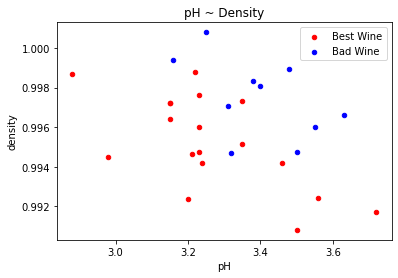

In [37]:
#plotting result
result = best_wine.plot(kind='scatter', x = 'pH', y='density', label='Best Wine', color='red')
bad_wine.plot(kind='scatter', x = 'pH', y = 'density', label='Bad Wine', color='blue', ax=result)
plt.title("pH ~ Density")

## Visualization

<AxesSubplot:>

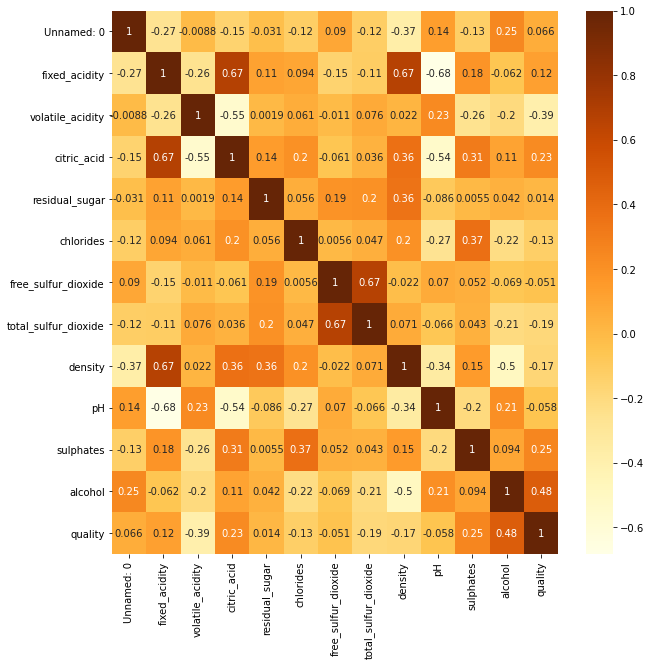

In [29]:
#heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


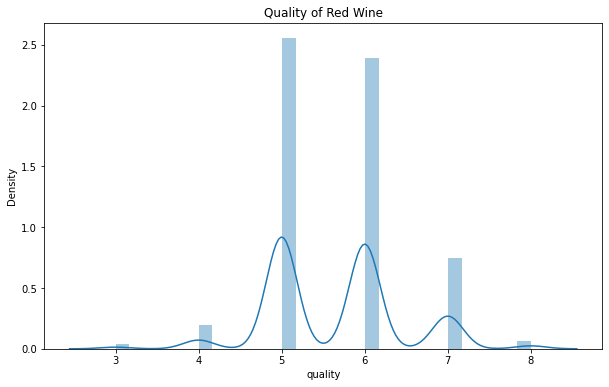

In [30]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(df.quality)
plt.title("Quality of Red Wine")
plt.show()